<b><p style="font-size:30px">Food Delivery Service Performance & Risk Analysis (2020–2025)</p></b>

<b><p style="font-size:22px">Overview</b></p>

<p style="font-size:16px">This Python script analyzes the stock performance of major U.S. food delivery companies — 
<b>DoorDash (DASH)</b>, <b>Uber (UBER)</b>, <b>Amazon (AMZN)</b> — using historical data retrieved from the Yahoo Finance API.</p>

<p style="font-size:16px">The analysis covers the period from January 2020 to October 2025 and focuses on three key aspects:
<ol style="font-size:16px";type="1">
<li><b>Trend Analysis:</b> Visualizes 5-year stock price movements to identify growth and recovery patterns.</li>
<li><b>Volatility Analysis:</b> Measures the standard deviation of daily returns to assess investment risk.</li>
<li><b>Risk–Return Analysis:</b> Compares expected returns against volatility to evaluate which companies</li>
   offer the best tradeoff between risk and reward.
</ol>
</p>
<p style="font-size:16px">The project demonstrates data extraction, transformation, and visualization techniques using Python libraries including Pandas, Matplotlib, and yFinance. 
Insights highlight post-pandemic stock recovery, volatility differences across companies, 
and how each firm’s business model affects its investment profile.</p>

<b><p style="font-size:22px">Library Imports</b></p>

In [1]:
# This is used to for data ETL using the Yahoo Finance API
import yfinance as yf

In [2]:
# Imports for exploatory data analysis (EDA), data cleaning, and visualization
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<b><p style="font-size:22px">Connecting to API and Obtaining Data</b></p>

In [3]:
# get_stock_history: Function to obtain stock data from Jan 1, 2020 to Oct 21, 2025 from Yahoo Finance
def get_stock_history(ticker):
    data = yf.Ticker(ticker).history(start='2020-01-01', end='2025-10-21')
    data['ticker'] = ticker
    return data

In [6]:
# It will obtain the stock data on a rolling 5-year period for the following food delivery service companies
# DoorDash: DASH
# Uber (Uber Eats): UBER
# Amazon (Whole Foods and Amazon Fresh: AMZN

# The stock data for all three companies will be consolidated into one dataframe by calling the get_stock_history function
tickers = ['DASH', 'UBER', 'AMZN']
df = pd.concat([get_stock_history(t) for t in tickers])

<b><p style="font-size:22px">Data Validation & Cleaning</b></p>

In [7]:
# Information on newly-created dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4137 entries, 2020-12-09 00:00:00-05:00 to 2025-10-20 00:00:00-04:00
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          4137 non-null   float64
 1   High          4137 non-null   float64
 2   Low           4137 non-null   float64
 3   Close         4137 non-null   float64
 4   Volume        4137 non-null   int64  
 5   Dividends     4137 non-null   float64
 6   Stock Splits  4137 non-null   float64
 7   ticker        4137 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 290.9+ KB


In [8]:
# Output the first ten rows of dataframe
df.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker
Date,,,,,,,,
2020-12-09 00:00:00-05:00,182.000000,195.500000,163.800003,189.509995,25373700,0.0,0.0,DASH
2020-12-10 00:00:00-05:00,179.710007,187.695007,172.636002,186.000000,9307600,0.0,0.0,DASH
2020-12-11 00:00:00-05:00,176.520004,182.000000,168.250000,175.000000,4760600,0.0,0.0,DASH
2020-12-14 00:00:00-05:00,169.100006,170.000000,151.199997,160.000000,7859600,0.0,0.0,DASH
2020-12-15 00:00:00-05:00,157.100006,161.419998,153.759995,158.889999,5017000,0.0,0.0,DASH
2020-12-16 00:00:00-05:00,161.179993,167.470001,157.199997,158.050003,3061300,0.0,0.0,DASH
2020-12-17 00:00:00-05:00,159.100006,161.660004,149.949997,154.210007,6369800,0.0,0.0,DASH
2020-12-18 00:00:00-05:00,154.210007,169.949997,147.320007,166.350006,8157800,0.0,0.0,DASH
2020-12-21 00:00:00-05:00,169.070007,173.460007,155.000000,160.229996,3884200,0.0,0.0,DASH


In [9]:
# Output last ten rows of dataframe
df.tail(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker
Date,,,,,,,,
2025-10-07 00:00:00-04:00,220.880005,222.889999,220.169998,221.779999,31194700,0.0,0.0,AMZN
2025-10-08 00:00:00-04:00,222.919998,226.729996,221.190002,225.220001,46686000,0.0,0.0,AMZN
2025-10-09 00:00:00-04:00,225.000000,228.210007,221.750000,227.740005,46412100,0.0,0.0,AMZN
2025-10-10 00:00:00-04:00,226.210007,228.250000,216.000000,216.369995,72367500,0.0,0.0,AMZN
2025-10-13 00:00:00-04:00,217.699997,220.679993,217.039993,220.070007,37809700,0.0,0.0,AMZN
2025-10-14 00:00:00-04:00,215.559998,219.320007,212.600006,216.389999,45665600,0.0,0.0,AMZN
2025-10-15 00:00:00-04:00,216.619995,217.710007,212.660004,215.570007,45909500,0.0,0.0,AMZN
2025-10-16 00:00:00-04:00,215.669998,218.589996,212.809998,214.470001,42414600,0.0,0.0,AMZN
2025-10-17 00:00:00-04:00,214.559998,214.800003,211.029999,213.039993,45986900,0.0,0.0,AMZN


In [10]:
# As the date is an index, this will make the date a column in the dataframe
df = df.reset_index().rename(columns={'index': 'Date'})

In [11]:
# Outputting the info after making the Date into a column in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4137 entries, 0 to 4136
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype                           
---  ------        --------------  -----                           
 0   Date          4137 non-null   datetime64[ns, America/New_York]
 1   Open          4137 non-null   float64                         
 2   High          4137 non-null   float64                         
 3   Low           4137 non-null   float64                         
 4   Close         4137 non-null   float64                         
 5   Volume        4137 non-null   int64                           
 6   Dividends     4137 non-null   float64                         
 7   Stock Splits  4137 non-null   float64                         
 8   ticker        4137 non-null   object                          
dtypes: datetime64[ns, America/New_York](1), float64(6), int64(1), object(1)
memory usage: 291.0+ KB


In [12]:
# Output the first six rows of the dataframe -- verify the Date field is no longer an index, but a column
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker
0,2020-12-09 00:00:00-05:00,182.000000,195.500000,163.800003,189.509995,25373700,0.0,0.0,DASH
1,2020-12-10 00:00:00-05:00,179.710007,187.695007,172.636002,186.000000,9307600,0.0,0.0,DASH
2,2020-12-11 00:00:00-05:00,176.520004,182.000000,168.250000,175.000000,4760600,0.0,0.0,DASH
3,2020-12-14 00:00:00-05:00,169.100006,170.000000,151.199997,160.000000,7859600,0.0,0.0,DASH
4,2020-12-15 00:00:00-05:00,157.100006,161.419998,153.759995,158.889999,5017000,0.0,0.0,DASH


In [13]:
# The Date field is a timestamp. This will change the format of the values into YYYY-MM-DD
df['Date'] = df['Date'].dt.date

In [14]:
# Viewing the first six rows of the dataframe to verify the new format of the Date field.
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker
0,2020-12-09,182.000000,195.500000,163.800003,189.509995,25373700,0.0,0.0,DASH
1,2020-12-10,179.710007,187.695007,172.636002,186.000000,9307600,0.0,0.0,DASH
2,2020-12-11,176.520004,182.000000,168.250000,175.000000,4760600,0.0,0.0,DASH
3,2020-12-14,169.100006,170.000000,151.199997,160.000000,7859600,0.0,0.0,DASH
4,2020-12-15,157.100006,161.419998,153.759995,158.889999,5017000,0.0,0.0,DASH


In [15]:
# Only keep the columns needed for analysis
select_cols = ['Date', 'Close', 'ticker']
df = df[select_cols]

In [16]:
# View info on the dataframe that has been reduced to three columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4137 entries, 0 to 4136
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4137 non-null   object 
 1   Close   4137 non-null   float64
 2   ticker  4137 non-null   object 
dtypes: float64(1), object(2)
memory usage: 97.1+ KB


In [17]:
# View first 6 rows of new dataframe
df.head()

,Date,Close,ticker
0,2020-12-09,189.509995,DASH
1,2020-12-10,186.000000,DASH
2,2020-12-11,175.000000,DASH
3,2020-12-14,160.000000,DASH
4,2020-12-15,158.889999,DASH


<b><p style="font-size:22px">Trend Analysis</b></p>

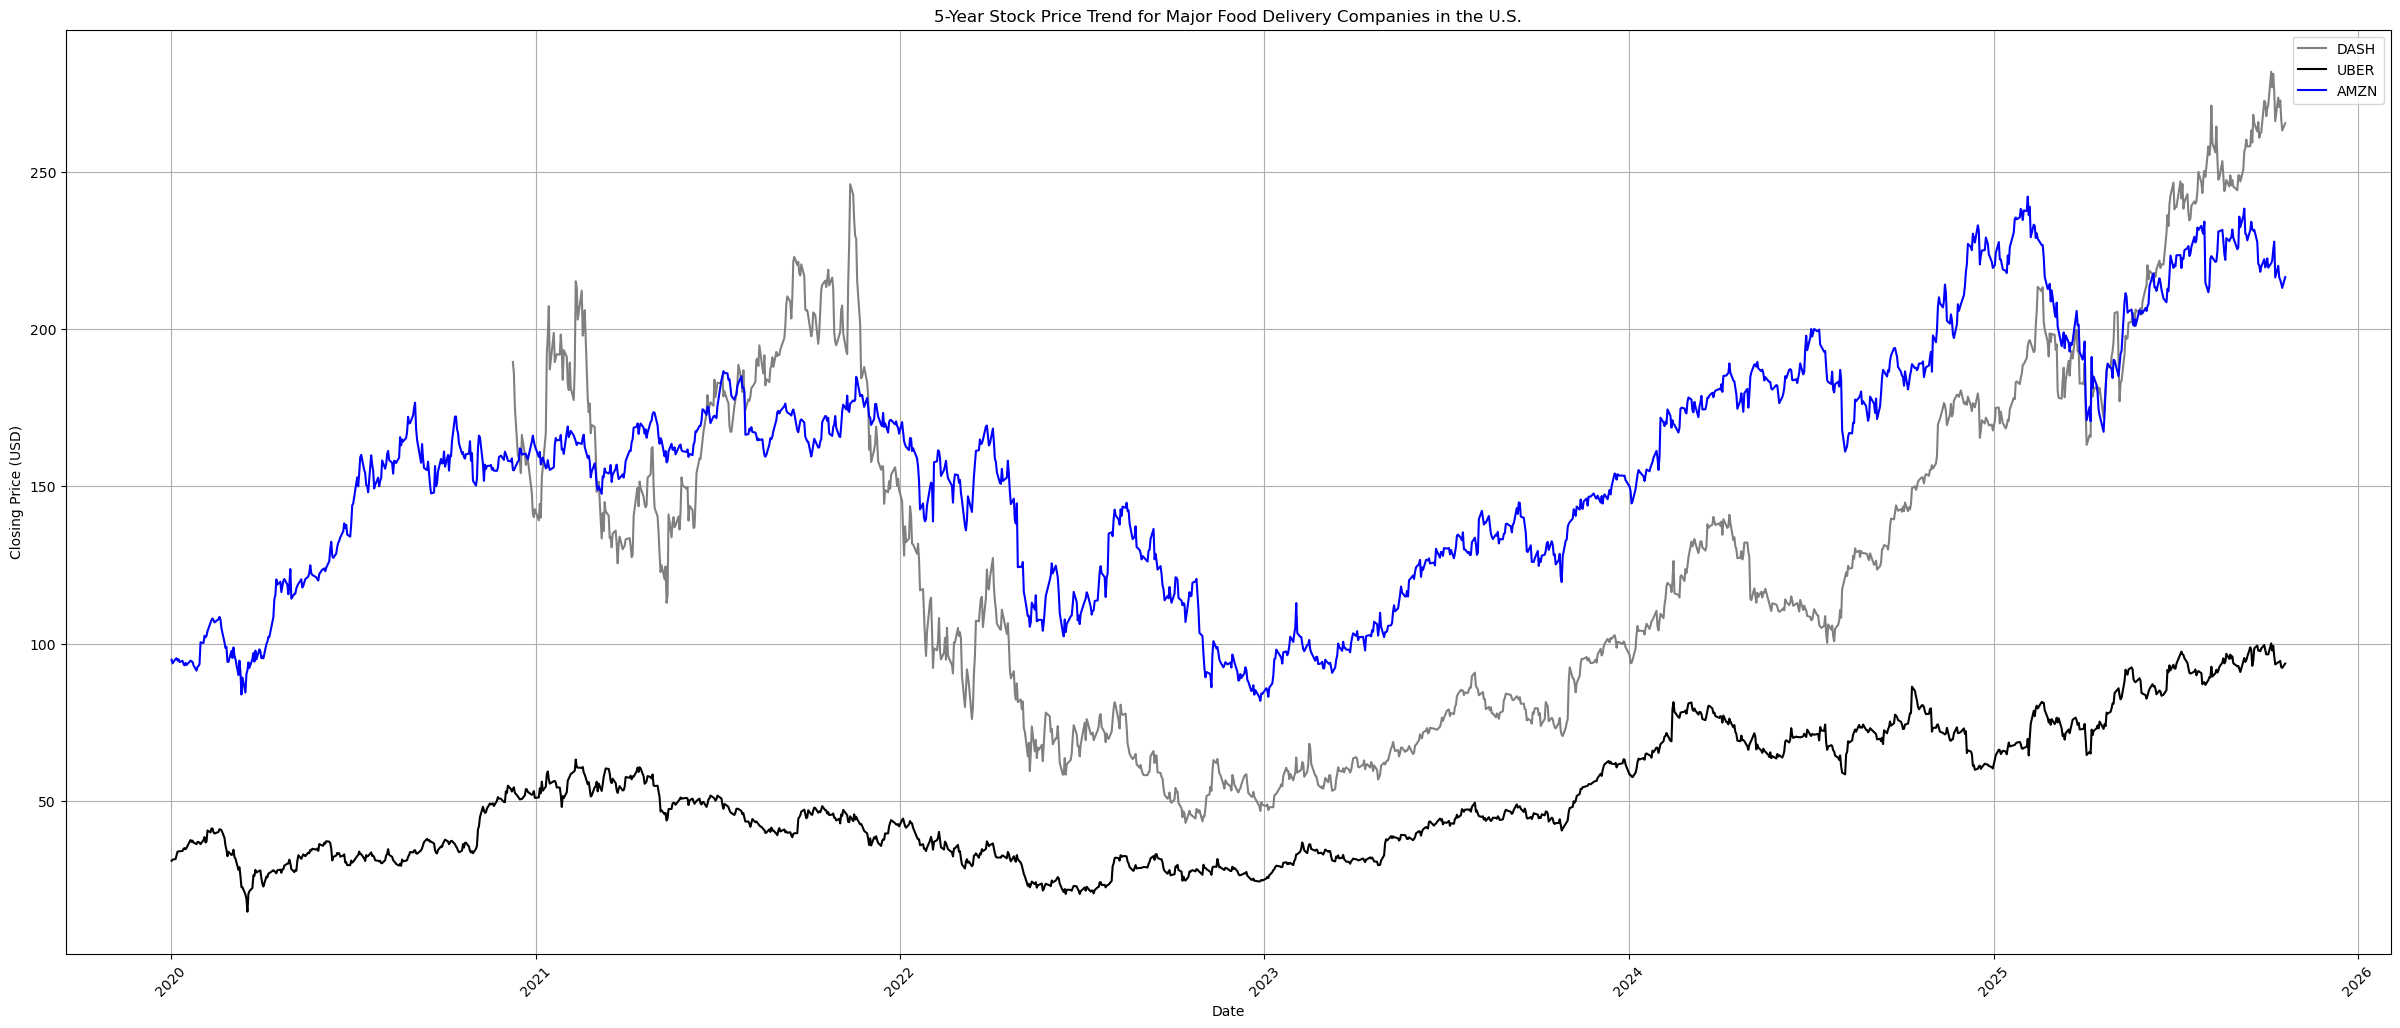

In [32]:
# Time-series chart comparing the closing prices for the three companies during the past 5 years
plt.figure(figsize=(30,12))

plt.plot(df.loc[df['ticker'] == 'DASH', 'Date'],
         df.loc[df['ticker'] == 'DASH', 'Close'],
         color='gray', label='DASH')

plt.plot(df.loc[df['ticker'] == 'UBER', 'Date'],
         df.loc[df['ticker'] == 'UBER', 'Close'],
         color='black', label='UBER')

plt.plot(df.loc[df['ticker'] == 'AMZN', 'Date'],
         df.loc[df['ticker'] == 'AMZN', 'Close'],
         color='blue', label='AMZN')

plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.xticks(rotation=45)
plt.title("5-Year Stock Price Trend for Major Food Delivery Companies in the U.S.")
plt.legend()
plt.grid(True)
plt.show()

<p style="font-size:16px">Following the onset of the COVID-19 pandemic in Q1 2020, Amazon experienced a significant increase in its stock price, driven by heightened e-commerce and delivery demand.</p>

<p style="font-size:16px">DoorDash entered the market shortly after, debuting with its initial public offering on December 9, 2020, at $120 per share. The IPO reflected investor optimism in the food delivery sector’s long-term growth potential.</p>

<p style="font-size:16px">Beginning in Q4 2021, both Amazon and DoorDash saw a downward correction in their stock prices, coinciding with post-pandemic normalization and tightening macroeconomic conditions. This decline persisted through 2022 and stabilized by Q1 2023, where both companies’ prices began a sustained upward recovery trend.</p>

<p style="font-size:16px">By Q4 2025, both Amazon and DoorDash had exceeded $200 per share, underscoring renewed investor confidence and operational expansion across the delivery ecosystem.</p>

<p style="font-size:16px">Meanwhile, Uber maintained a steady but moderate performance across the five-year period, with its stock peaking at approximately $100 per share in Q4 2025. This stability reflects balanced growth in its rideshare and delivery segments, coupled with consistent revenue diversification.</p>

<b><p style="font-size:22px">Returns</b></p>

In [19]:
# 'return' field created to calculate stock return for each day
df['return'] = df.groupby('ticker')['Close'].pct_change()

In [20]:
# View the first 6 rows of the dataframe after the 'return' column added
df.head()

,Date,Close,ticker,return
0,2020-12-09,189.509995,DASH,NaN
1,2020-12-10,186.000000,DASH,-0.018521
2,2020-12-11,175.000000,DASH,-0.059140
3,2020-12-14,160.000000,DASH,-0.085714
4,2020-12-15,158.889999,DASH,-0.006938


In [21]:
# A new dataframe named ret_df that will include the returns of each airline during the rolling 10-year period
select_cols = ['Date', 'ticker', 'return']
ret_df = df[select_cols]

In [22]:
# Info regarding the ret_df dataframe
ret_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4137 entries, 0 to 4136
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4137 non-null   object 
 1   ticker  4137 non-null   object 
 2   return  4134 non-null   float64
dtypes: float64(1), object(2)
memory usage: 97.1+ KB


In [23]:
# A pivot table for returns dataframe
# This will be used for further statistical analysis
returns_pivot = pd.pivot_table(data=ret_df, values='return', index='Date', columns='ticker', aggfunc='sum')

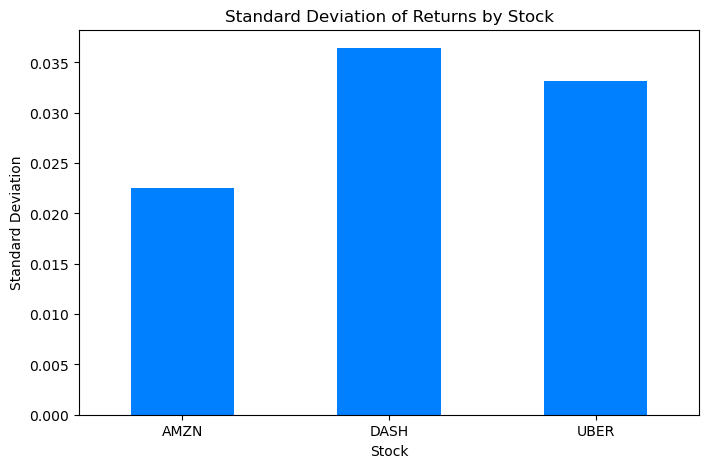

In [24]:
# Visualization for standard deviation of returns for each stock.

# A variable to calculate the standard deviation of the stock returns
ret_std = returns_pivot.std()

fig, ax = plt.subplots(figsize=(8, 5))
ret_std.plot(kind='bar', ax=ax, color='#007fff')
ax.set_title('Standard Deviation of Returns by Stock')
ax.set_xlabel('Stock')
ax.set_ylabel('Standard Deviation')
ax.tick_params(axis='x', rotation=0) # Keeps labels horizontal
plt.show()

<p style="font-size:16px">Amazon demonstrated the lowest standard deviation, indicating the most stable returns and lowest volatility among the group.
DoorDash and Uber exhibited higher standard deviations, suggesting greater fluctuations in daily returns and higher relative investment risk.</p>

<b><p style="font-size:22px">Risk Analysis</b></p>

In [25]:
# A new dataframe created to calculate the means of the stock returns
ret_mean = pd.DataFrame(returns_pivot.mean())
ret_mean.reset_index(inplace=True)
ret_mean = ret_mean.rename(columns = {0:'mean'})

In [26]:
# View records of the mean dataframe created
ret_mean.head()

,ticker,mean
0,AMZN,0.000819
1,DASH,0.000936
2,UBER,0.001297


In [27]:
# A dataframe that consolidates the standard deviations and means of each stock
# Before that, the ret_std variable needs to be converted to a dataframe

ret_std = pd.DataFrame(returns_pivot.std())
ret_std.reset_index(inplace=True)
ret_std = ret_std.rename(columns = {0:'std'})

In [28]:
# Joining the ret_mean and ret_std dataframes to create the ret_summary dataframe
# The dataframes will be inner joined on the 'ticker' field
ret_summary = ret_mean.merge(ret_std, how='inner')

In [29]:
# View the records of the ret_summary dataset
ret_summary.head()

,ticker,mean,std
0,AMZN,0.000819,0.022524
1,DASH,0.000936,0.036427
2,UBER,0.001297,0.033147


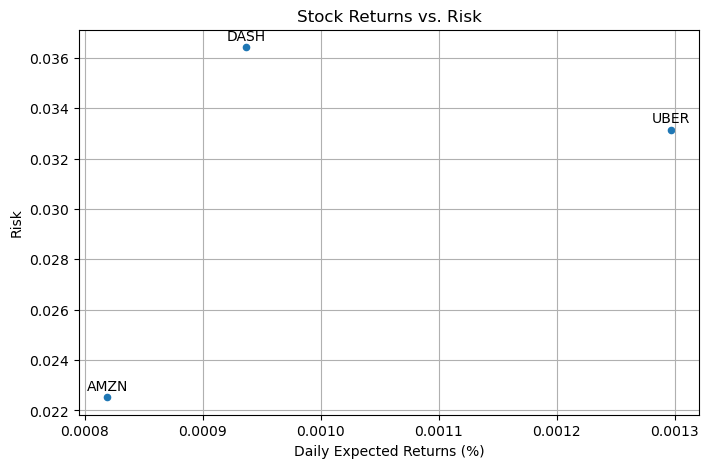

In [30]:
# A scatterplot will identify the returns and risks of each stock
ax = ret_summary.plot(kind='scatter', x='mean', y='std', figsize=(8,5))
ax.set(title='Stock Returns vs. Risk',
       xlabel='Daily Expected Returns (%)',
       ylabel='Risk')

# Each stock is represented by a point in the scatterplot
for idx, row in ret_summary.iterrows():
    ax.annotate(row['ticker'], (row['mean'], row['std']),
                size=10, ha='center', va="bottom",  
                textcoords='offset points', xytext=(0, 3))

plt.grid(True)
plt.show()

<p style="font-size:16px">The risk–return scatterplot compares the average daily returns (expected returns) to the standard deviation of returns (risk) for each company.</p>

<p style="font-size:16px">Amazon recorded the lowest expected return but also the lowest risk, reflecting stable and predictable performance — ideal for conservative investors prioritizing consistency.</p>

<p style="font-size:16px">DoorDash and Uber exhibited higher expected returns accompanied by greater volatility, suggesting a stronger growth potential balanced by increased investment risk.</p>

<p style="font-size:16px">This relationship aligns with classic risk–reward dynamics: companies with emerging or growth-focused delivery models (like DoorDash and Uber) deliver higher upside potential, while diversified leaders such as Amazon provide steadier, lower-risk returns.</p>